### Colorectal Cancer Dataset

In [1]:
# load modules
import pandas as pd
from src import read
from src import preprocessing
from src import eda
from src import modelling

# reload modules to apply changes
from importlib import reload
reload(read);
reload(preprocessing);
reload(eda);
reload(modelling);

In [2]:
# define data folder path and data file names
raw_data_folder = r"C:\Users\35799\Desktop\cookiecutter-analytical-project\biolizard-internship-marios\data\raw"
gene_expression_data = r"Colorectal Cancer Gene Expression Data.csv"
patient_data = r"Colorectal Cancer Patient Data.csv"

# load data
gene_expression_df = read.data_load(folder=raw_data_folder, filename=gene_expression_data)
patient_df = read.data_load(folder=raw_data_folder, filename=patient_data)

# combine data into one Pandas DataFrame
gene_expression_df_transposed = gene_expression_df.transpose()
gene_expression_df_transposed.columns = gene_expression_df_transposed.iloc[0]
gene_expression_df_transposed_index = gene_expression_df_transposed.drop("ID_REF", axis=0)
gene_expression_df_transposed_index_final = gene_expression_df_transposed_index.astype("float64")
data_df = pd.merge(patient_df, gene_expression_df_transposed_index_final, right_index=True, left_on='ID_REF')

### Data Info

In [3]:
# data info
data_df.head()

ID_REF  Age (in years) Dukes Stage  Gender Location  DFS (in months)  \
0  GSM877126            62.0           A    Male     Left            108.0   
1  GSM877127            77.0           B    Male     Left             40.0   
2  GSM877128            66.0           C  Female     Left             49.0   
3  GSM877129            72.0           D  Female     Left             45.0   
4  GSM877130            75.0           C    Male     Left             40.0   

   DFS event  Adj_Radio  Adj_Chem    117_at  1007_s_at   1053_at    121_at  \
0        0.0        1.0       0.0  6.029834   9.468893  7.187090  6.807582   
1        1.0        1.0       0.0  6.344321   9.994204  7.705626  6.893130   
2        0.0        1.0       0.0  5.023127  10.409823  7.934057  7.165602   
3        0.0        1.0       1.0  4.612727  10.596921  7.446374  7.071417   
4        0.0        0.0       1.0  5.865944  10.252547  7.141105  7.103383   

   1255_g_at   1294_at   1316_at   1320_at  1405_i_at   1431_at   1438_at  \
0   3.084591  7.397013  6.525426  3.848253   7.572331  3.748200  6.957488   
1   3.118704  7.163797  6.391195  4.202085   8.295322  3.114340  7.366494   
2   2.984632  7.375224  5.538846  4.074462   7.055579  4.172270  9.190242   
3   2.912851  7.596233  5.989148  3.738205   9.683806  3.625413  7.493741   
4   3.383726  7.278244  5.678236  4.141955   7.360892  3.338311  6.068710   

    1487_at  1494_f_at  1552256_a_at  1552257_a_at  1552258_at  1552261_at  \
0  8.057704   4.311960      7.246198      8.998012    3.912720    4.206709   
1  8.450329   4.257666      8.113613      9.154566    4.223799    3.359484   
2  8.186155   4.390612      7.038909      8.273925    3.988332    3.434758   
3  7.398235   4.308245      7.547753      9.075829    3.885780    4.225294   
4  7.919004   4.188543      7.921648      7.992741    4.960633    3.391169   

   1552263_at  1552264_a_at  1552266_at  1552269_at  1552271_at  1552272_a_at  \
0    6.293766      6.585635    2.837637    3.024119    4.561616      4.371035   
1    7.781680      8.131629    2.408522    2.942956    3.882600      4.264255   
2    5.245886      6.081574    2.800716    2.845071    4.749350      5.269892   
3    5.958728      6.779613    2.659192    3.280929    4.333246      4.509829   
4    6.249177      6.517431    2.556627    2.872373    4.438411      3.997675   

   1552274_at  1552275_s_at  1552276_a_at  1552277_a_at  1552278_a_at  \
0    6.120874      4.361976      4.765517      7.101751      3.900317   
1    6.112272      4.974505      4.482178      7.397170      4.620965   
2    4.948306      4.151721      4.577981      7.800087      4.231365   
3    6.325548      4.535780      4.417799      7.025963      4.167651   
4    6.070412      5.086089      4.243861      7.723245      4.286986   

   1552279_a_at  1552280_at  1552281_at  1552283_s_at  1552286_at  \
0      5.035382    2.830732    6.470622      3.906776    5.081563   
1      5.417600    3.424860    7.581700      4.590770    4.608948   
2      5.261286    3.240356    6.405948      5.156768    5.788224   
3      5.284253    3.010893    6.372876      6.108916    5.102382   
4      5.683226    3.116138    7.471077      3.897945    4.986585   

   1552287_s_at  1552288_at  1552289_a_at  1552291_at  1552293_at  \
0      6.837268    3.297914      4.153212    6.358204    3.360942   
1      6.190298    3.921998      5.008631    6.512021    3.815529   
2      6.788046    3.498495      3.475740    6.277524    3.473501   
3      6.382470    3.253702      4.094617    6.637175    3.831071   
4      6.793243    3.222510      3.844001    5.937285    3.699799   

   1552295_a_at  1552296_at  1552299_at  1552301_a_at  1552302_at  \
0      5.999121    3.611584    4.041372      3.673284    4.436078   
1      5.832778    3.944787    4.022736      3.668590    3.242581   
2      6.072805    3.626742    5.108468      3.723708    3.474229   
3      6.029997    4.252454    4.464719      3.599279    3.869152   
4      6.698944    3.816713    4.55

In [4]:
id_features, categorical_features, continuous_features = read.data_info(data_df, threshold=20)

DIMENSIONS:
----------------------------------------------------------------------------------------------------
Entries: 62
Features: 1944
----------------------------------------------------------------------------------------------------


CATEGORICAL FEATURES:
----------------------------------------------------------------------------------------------------
Features     Data Type    Categories & Counts
-----------  -----------  ---------------------------------------------------
Dukes Stage  object       {'A': 16, 'B': 14, 'C': 20, 'D': 12}
Gender       object       {'Female': 14, 'Male': 48}
Location     object       {'Colon': 2, 'Left': 20, 'Rectum': 18, 'Right': 22}
DFS event    float64      {0.0: 25, 1.0: 37}
Adj_Radio    float64      {0.0: 29, 1.0: 33}
Adj_Chem     float64      {0.0: 32, 1.0: 30}
----------------------------------------------------------------------------------------------------


CONTINUOUS FEATURES:
---------------------------------------------------------

### Data Preprocessing

In [5]:
# remove rows where Location == Colon as there are only two cases
data_df = data_df.drop(data_df[data_df["Location"] == "Colon"].index)

In [6]:
# data split
X, y, X_train, y_train, X_test, y_test, _, _ = preprocessing.data_split(data_df, target="Dukes Stage", method="tt", train_proportion=0.8, validation_proportion=0.25, stratify=True, random_state=0)

In [7]:
# treat missing values
train_df, test_df = preprocessing.treat_nan(X_train, y_train, X_test, y_test, id_features, categorical_features, continuous_features, target="Dukes Stage", drop_nan_rows=False, impute_cutoff=0.5, categorical_imputer="mode", continuous_imputer="median")

In [8]:
# treat duplicate values
train_df, test_df = preprocessing.treat_duplicate(train_df, test_df, keep_in="first")

In [9]:
# treat outliers
train_df, test_df = preprocessing.treat_outliers(train_df, test_df, id_features, categorical_features, continuous_features, target="Dukes Stage", method="svm", outlier_fraction=0.05)

The following entries are probable outliers as identified by the One-class Support Vector Machine technique (train set):


,ID_REF,Gender,Location,DFS event,Adj_Radio,Adj_Chem,Age (in years),DFS (in months),117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,1552299_at,1552301_a_at,1552302_at,1552303_a_at,1552304_at,1552306_at,1552307_a_at,1552309_a_at,1552310_at,1552311_a_at,1552312_a_at,1552314_a_at,1552315_at,1552316_a_at,1552318_at,1552319_a_at,1552320_a_at,1552321_a_at,1552322_at,1552323_s_at,1552325_at,1552326_a_at,1552327_at,1552329_at,1552330_at,1552332_at,1552334_at,1552335_at,1552337_s_at,1552338_at,1552340_at,1552343_s_at,1552344_s_at,1552347_at,1552348_at,1552349_a_at,1552354_at,1552355_s_at,1552359_at,1552360_a_at,1552362_a_at,1552364_s_at,1552365_at,1552367_a_at,1552368_at,1552370_at,1552372_at,1552373_s_at,1552375_at,1552377_s_at,1552378_s_at,1552379_at,1552381_at,1552383_at,1552384_a_at,1552386_at,1552388_at,1552389_at,1552390_a_at,1552391_at,1552393_at,1552394_a_at,1552395_at,1552396_at,1552398_a_at,1552399_a_at,1552400_a_at,1552401_a_at,1552402_at,1552405_at,1552408_at,1552409_a_at,1552410_at,1552411_at,1552412_a_at,1552414_at,1552415_a_at,1552417_a_at,1552418_at,1552419_s_at,1552421_a_at,1552422_at,1552423_at,1552424_at,1552425_a_at,1552426_a_at,1552427_at,1552430_at,1552432_at,1552436_a_at,1552438_a_at,1552439_s_at,1552440_at,1552445_a_at,1552448_a_at,1552449_a_at,1552450_a_at,1552452_at,1552453_a_at,1552455_at,1552456_a_at,1552457_a_at,1552458_at,1552459_a_at,1552461_at,1552463_at,1552466_x_at,1552467_at,1552468_a_at,1552470_a_at,1552472_a_at,1552473_at,1552474_a_at,1552476_s_at,1552477_a_at,1552478_a_at,1552480_s_at,1552481_s_at,1552482_at,1552484_at,1552485_at,1552486_s_at,1552487_a_at,1552489_s_at,1552490_at,1552491_at,1552493_s_at,1552494_at,1552496_a_at,1552497_a_at,1552498_at,1552499_a_at,1552501_a_at,1552502_s_at,1552503_at,1552504_a_at,1552506_at,1552507_at,1552508_at,1552509_a_at,1552510_at,1552511_a_at,1552514_at,1552515_at,1552516_a_at,1552518_s_at,1552519_at,1552520_at,1552521_a_at,1552522_at,1552523_a_at,1552524_at,1552526_at,1552528_at,1552531_a_at,1552532_a_at,1552535_at,1552536_at,1552538_a_at,1552540_s_at,1552541_at,1552542_s_at,1552543_a_at,1552544_at,1552546_a_at,1552548_at,1552549_a_at,1552552_s_at,1552553_a_at,1552554_a_at,1552555_at,1552557_a_at,1552558_a_at,1552559_a_at,1552562_at,1552563_a_at,1552564_at,1552566_at,1552568_at,1552569_a_at,1552570_at,1552572_a_at,1552573_s_at,1552575_a_at,1552576_at,1552578_a_at,1552579_a_at,1552580_at,1552582_at,1552583_s_at,1552584_at,1552585_s_at,1552586_at,1552587_at,1552588_a_at,1552590_a_at,1552592_at,1552594_at,1552596_at,1552598_at,1552599_at,1552602_at,1552604_at,1552605_s_at,1552607_at,1552608_at,1552609_s_at,1552610_a_at,1552611_a_at,1552612_at,1552613_s_at,1552615_at,1552616_a_at,1552617_a_at,1552618_at,1552619_a_at,1552620_at,1552621_at,1552622_s_at,1552623_at,1552625_a_at,1552626_a_at,1552627_a_at,1552628_a_at,1552629_a_at,1552630_a_at,1552631_a_at,1552632_a_at,1552633_at,1552634_a_at,1552637_at,1552639_at,1552641_s_at,1552643_at,1552644_a_at,1552646_at,1552648_a_at,1552649_a_at,1552651_a_at,1552652_at,1552656_s_at,1552657_a_at,1552658_a_at,1552660_a_at,1552661_at,1552662_a_at,1552663_a_at,1552664_at,1552665_at,1552666_a_at,1552667_a_at,1552669_at,1552670_a_at,1552671_a_at,1552672_a_at,1552673_at,1552674_at,1552675_at,1552676_at,1552677_a_at,1552678_a_at,1552680_a_at,1552682_a_at,1552684_a_at,1552685_a_at,1552686_at,1552687_a_at,1552689_at,1552690_a_at,1552691_at,1552693_at,1552694_at,1552695_a_at,1552696_at,1552698_at,1552701_a_at,1552703_s_at,1552705_at,1552708_a_at,1552711_a_at,1552712_a_at,1552713_a_at,1552714_at,1552715_a_at,1552716_at,1552717_s_at,1552718_at,1552719_at,1552721_a

The following entries are probable outliers as identified by the One-class Support Vector Machine technique (test set):


,ID_REF,Gender,Location,DFS event,Adj_Radio,Adj_Chem,Age (in years),DFS (in months),117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,1552299_at,1552301_a_at,1552302_at,1552303_a_at,1552304_at,1552306_at,1552307_a_at,1552309_a_at,1552310_at,1552311_a_at,1552312_a_at,1552314_a_at,1552315_at,1552316_a_at,1552318_at,1552319_a_at,1552320_a_at,1552321_a_at,1552322_at,1552323_s_at,1552325_at,1552326_a_at,1552327_at,1552329_at,1552330_at,1552332_at,1552334_at,1552335_at,1552337_s_at,1552338_at,1552340_at,1552343_s_at,1552344_s_at,1552347_at,1552348_at,1552349_a_at,1552354_at,1552355_s_at,1552359_at,1552360_a_at,1552362_a_at,1552364_s_at,1552365_at,1552367_a_at,1552368_at,1552370_at,1552372_at,1552373_s_at,1552375_at,1552377_s_at,1552378_s_at,1552379_at,1552381_at,1552383_at,1552384_a_at,1552386_at,1552388_at,1552389_at,1552390_a_at,1552391_at,1552393_at,1552394_a_at,1552395_at,1552396_at,1552398_a_at,1552399_a_at,1552400_a_at,1552401_a_at,1552402_at,1552405_at,1552408_at,1552409_a_at,1552410_at,1552411_at,1552412_a_at,1552414_at,1552415_a_at,1552417_a_at,1552418_at,1552419_s_at,1552421_a_at,1552422_at,1552423_at,1552424_at,1552425_a_at,1552426_a_at,1552427_at,1552430_at,1552432_at,1552436_a_at,1552438_a_at,1552439_s_at,1552440_at,1552445_a_at,1552448_a_at,1552449_a_at,1552450_a_at,1552452_at,1552453_a_at,1552455_at,1552456_a_at,1552457_a_at,1552458_at,1552459_a_at,1552461_at,1552463_at,1552466_x_at,1552467_at,1552468_a_at,1552470_a_at,1552472_a_at,1552473_at,1552474_a_at,1552476_s_at,1552477_a_at,1552478_a_at,1552480_s_at,1552481_s_at,1552482_at,1552484_at,1552485_at,1552486_s_at,1552487_a_at,1552489_s_at,1552490_at,1552491_at,1552493_s_at,1552494_at,1552496_a_at,1552497_a_at,1552498_at,1552499_a_at,1552501_a_at,1552502_s_at,1552503_at,1552504_a_at,1552506_at,1552507_at,1552508_at,1552509_a_at,1552510_at,1552511_a_at,1552514_at,1552515_at,1552516_a_at,1552518_s_at,1552519_at,1552520_at,1552521_a_at,1552522_at,1552523_a_at,1552524_at,1552526_at,1552528_at,1552531_a_at,1552532_a_at,1552535_at,1552536_at,1552538_a_at,1552540_s_at,1552541_at,1552542_s_at,1552543_a_at,1552544_at,1552546_a_at,1552548_at,1552549_a_at,1552552_s_at,1552553_a_at,1552554_a_at,1552555_at,1552557_a_at,1552558_a_at,1552559_a_at,1552562_at,1552563_a_at,1552564_at,1552566_at,1552568_at,1552569_a_at,1552570_at,1552572_a_at,1552573_s_at,1552575_a_at,1552576_at,1552578_a_at,1552579_a_at,1552580_at,1552582_at,1552583_s_at,1552584_at,1552585_s_at,1552586_at,1552587_at,1552588_a_at,1552590_a_at,1552592_at,1552594_at,1552596_at,1552598_at,1552599_at,1552602_at,1552604_at,1552605_s_at,1552607_at,1552608_at,1552609_s_at,1552610_a_at,1552611_a_at,1552612_at,1552613_s_at,1552615_at,1552616_a_at,1552617_a_at,1552618_at,1552619_a_at,1552620_at,1552621_at,1552622_s_at,1552623_at,1552625_a_at,1552626_a_at,1552627_a_at,1552628_a_at,1552629_a_at,1552630_a_at,1552631_a_at,1552632_a_at,1552633_at,1552634_a_at,1552637_at,1552639_at,1552641_s_at,1552643_at,1552644_a_at,1552646_at,1552648_a_at,1552649_a_at,1552651_a_at,1552652_at,1552656_s_at,1552657_a_at,1552658_a_at,1552660_a_at,1552661_at,1552662_a_at,1552663_a_at,1552664_at,1552665_at,1552666_a_at,1552667_a_at,1552669_at,1552670_a_at,1552671_a_at,1552672_a_at,1552673_at,1552674_at,1552675_at,1552676_at,1552677_a_at,1552678_a_at,1552680_a_at,1552682_a_at,1552684_a_at,1552685_a_at,1552686_at,1552687_a_at,1552689_at,1552690_a_at,1552691_at,1552693_at,1552694_at,1552695_a_at,1552696_at,1552698_at,1552701_a_at,1552703_s_at,1552705_at,1552708_a_at,1552711_a_at,1552712_a_at,1552713_a_at,1552714_at,1552715_a_at,1552716_at,1552717_s_at,1552718_at,1552719_at,1552721_a

In [10]:
# target feature imbalance check
preprocessing.target_balance_check(train_df, target="Dukes Stage", imbalance_fraction=0.5, graphic=False)

Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
A                              11               24.4
B                              10               22.2
C                              15               33.3
D                               9               20


The tagret feature levels are balanced.


In [11]:
### sampling to treat target feature imbalance

# oversampling ratios must be greater or equal to 1
oversampling_ratios = {"A": 1.2, "B": 1.2, "C": 1.2, "D": 1.2}
train_df_oversampled = preprocessing.sampler(train_df, target="Dukes Stage", method="over", sampling_ratios=oversampling_ratios, random_state=0, graphic=False)

Balanced target feature (oversampling):
Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
A                              18                 25
B                              18                 25
C                              18                 25
D                              18                 25


In [12]:
### sampling to treat target feature imbalance

# undersampling ratios must be less or equal to 1
undersampling_ratios = {"A": 0.8, "B": 0.8, "C": 0.8, "D": 0.8}
train_df_undersampled = preprocessing.sampler(train_df, target="Dukes Stage", method="under", sampling_ratios=undersampling_ratios, random_state=0, graphic=False)

Balanced target feature (undersampling):
Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
A                               8                 25
B                               8                 25
C                               8                 25
D                               8                 25


### Data Exploration

In [13]:
# data sample for examples
sample_df = train_df.loc[:, continuous_features].iloc[:, 2:12]
sample_df.head()

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at
36,7.473647,9.655227,7.432907,7.036744,3.022327,8.279301,5.344902,4.308143,10.057173,4.080034
15,5.253321,10.152299,8.271041,7.369269,2.936223,7.197039,5.993540,3.754870,8.939946,3.710754
39,5.774617,10.297960,7.067800,7.717166,3.572938,6.694061,6.132715,3.858564,6.733462,3.327047
3,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413
33,6.278339,10.256347,7.889203,7.215903,2.911203,7.879579,5.665528,4.021006,10.313287,4.391884


#### Correlation Matrix & Heatmap

In [14]:
# correlation matrix
pearson_corr_matrix = eda.correlations(sample_df, type="pearson", printout="matrix")

Pearson Correlation Matrix:


,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at
117_at,1.000,-0.147,0.128,-0.121,-0.084,0.047,-0.187,0.335,0.422,0.054
1007_s_at,-0.147,1.000,0.026,0.052,-0.034,-0.100,0.033,-0.166,-0.292,-0.055
1053_at,0.128,0.026,1.000,-0.063,-0.085,-0.295,-0.215,0.047,0.001,0.205
121_at,-0.121,0.052,-0.063,1.000,-0.116,0.105,0.225,-0.227,-0.060,-0.164
1255_g_at,-0.084,-0.034,-0.085,-0.116,1.000,-0.073,-0.018,0.050,0.012,0.021
1294_at,0.047,-0.100,-0.295,0.105,-0.073,1.000,0.040,0.178,0.489,0.173
1316_at,-0.187,0.033,-0.215,0.225,-0.018,0.040,1.000,-0.197,-0.032,-0.380
1320_at,0.335,-0.166,0.047,-0.227,0.050,0.178,-0.197,1.000,0.198,0.220
1405_i_at,0.422,-0.292,0.001,-0.060,0.012,0.489,-0.032,0.198,1.000,0.264
1431_at,0.054,-0.055,0.205,-0.164,0.021,0.173,-0.380,0.220,0.264,1.000


In [15]:
# correlation heatmap
spearman_corr_matrix = eda.correlations(sample_df, type="spearman", printout="heatmap")

#### Boxplots

In [16]:

eda.box_plot(train_df, features=list(sample_df.columns), stratify_var="Dukes Stage", group_var="Gender", title="Gene Expression of: ", xtitle="Gene", ytitle="Gene Expression Value", widget_description="Select: ", stratify=True, group=True)

In [17]:
eda.box_subplots(train_df, features=list(sample_df.columns), stratify_var="Location", columns=5, width=250, height=250, stratify=True)

#### Histograms

In [18]:
eda.hist_plot(train_df, features=list(sample_df.columns), group_var="Gender", title="Gene Expression Histogram of: ", xtitle="Gene Expression Value", ytitle="Count", widget_description="Select: ", group=True)

In [19]:
eda.hist_subplots(sample_df, columns=5, width=250, height=250)

#### Distribution plots

In [20]:
eda.dist_plot(sample_df, title="Gene Expression Distribution Plot:")

In [21]:
eda.dist_subplots(sample_df, columns=5, width=250, height=250)

#### Dimensionality Reduction

##### PCA

In [22]:
eda.pca_variance_plot(train_df, id_features, categorical_features, continuous_features, target="Dukes Stage")

In [23]:
encoded_train_df, pca2d_train_df, encoded_test_df, pca2d_test_df = eda.dimensionality_reduction(train_df, test_df, id_features, categorical_features, continuous_features, target="Dukes Stage", method="pca", plot_type="2d", components=2)

In [24]:
_, pca3d_train_df, _, pca3d_test_df = eda.dimensionality_reduction(train_df, test_df, id_features, categorical_features, continuous_features, target="Dukes Stage", method="pca", plot_type="3d", components=3)

In [25]:
_, pca5d_train_df, _, pca5d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="pca", plot_type="multi", components=5)

##### MDS

In [26]:
# _, mds2d_train_df, _, mds2d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="mds", plot_type="2d", components=2)

In [27]:
# _, mds3d_train_df, _, mds3d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="mds", plot_type="3d", components=3)

In [28]:
# _, mds5d_train_df, _, mds5d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="mds", plot_type="multi", components=5)

##### t-SNE

In [29]:
# _, tsne2d_train_df, _, tsne2d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="tsne", plot_type="2d", components=2, perplexity=30)

In [30]:
# _, tsne3d_train_df, _, tsne3d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="tsne", plot_type="3d", components=3, perplexity=30)

##### UMAP

In [31]:
# _, umpa2d_train_df, _, umpa2d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="umap", plot_type="2d", components=2, neighbors=100, min_distance=0.1, metric="euclidean")

In [32]:
# _, umpa3d_train_df, _, umpa3d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="umap", plot_type="3d", components=3, neighbors=100, min_distance=0.1, metric="euclidean")

In [33]:
# _, umpa5d_train_df, _, umpa5d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Dukes Stage", method="umap", plot_type="multi", components=5, neighbors=100, min_distance=0.1, metric="euclidean")

#### Cluster Analysis

In [34]:
pca2d_train_df.head()

,ID_REF,PC1,PC2,Dukes Stage
0,GSM877162,3.967695,12.748683,A
1,GSM877141,-9.668012,2.015062,B
2,GSM877165,-15.397265,-0.359100,C
3,GSM877129,11.757900,-7.246313,D
4,GSM877159,1.999632,19.729032,C


##### K-Means

In [35]:
eda.kmeans_inertia_plot(pca2d_train_df, identifier=id_features, target="Dukes Stage")

In [36]:
kmeans2d_train_df = eda.clustering(df=train_df, input_df=pca2d_train_df, identifier=id_features, target="Dukes Stage", method="kmeans", plot_type="2d", marker_size_ref="DFS (in months)", clusters=4, initializations=100, random_state=0)

In [37]:
kmeans3d_train_df = eda.clustering(df=train_df, input_df=pca3d_train_df, identifier=id_features, target="Dukes Stage", method="kmeans", plot_type="3d", marker_size_ref="DFS (in months)", clusters=4, initializations=100, random_state=0)

##### Hierarchical

In [38]:
# hierarchical2d_train_df = eda.clustering(df=train_df, input_df=pca2d_train_df, identifier=id_features, target="Dukes Stage", method="hierarchical", plot_type="2d", marker_size_ref="DFS (in months)", clusters=2)

In [39]:
# hierarchical3d_train_df = eda.clustering(df=train_df, input_df=pca3d_train_df, identifier=id_features, target="Dukes Stage", method="hierarchical", plot_type="3d", marker_size_ref="DFS (in months)", clusters=2)

##### DBSCAN

In [40]:
# dbscan2d_train_df = eda.clustering(df=train_df, input_df=pca2d_train_df, identifier=id_features, target="Dukes Stage", method="dbscan", plot_type="2d", marker_size_ref="DFS (in months)", epsilon=1, minimum_samples=10, algorithm="auto")

In [41]:
# dbscan3d_train_df = eda.clustering(df=train_df, input_df=pca3d_train_df, identifier=id_features, target="Dukes Stage", method="dbscan", plot_type="3d", marker_size_ref="DFS (in months)", epsilon=1, minimum_samples=15, algorithm="auto")

### Data Modelling

#### Feature Selection

##### Recursive Feature Ellimination

In [42]:
encoded_train_df.head()

ID_REF  Gender  DFS event  Adj_Radio  Adj_Chem  Location_Right  \
0  GSM877162       1          0          1         1             0.0   
1  GSM877141       0          1          0         1             1.0   
2  GSM877165       1          0          0         1             1.0   
3  GSM877129       0          0          1         1             1.0   
4  GSM877159       1          0          0         1             0.0   

   Location_Left  Location_Rectum  Age (in years)  DFS (in months)    117_at  \
0            0.0              1.0            61.0             46.0  7.473647   
1            0.0              0.0            57.0             17.0  5.253321   
2            0.0              0.0            46.0             15.0  5.774617   
3            0.0              0.0            72.0             45.0  4.612727   
4            0.0              1.0            62.0             56.0  6.278339   

   1007_s_at   1053_at    121_at  1255_g_at   1294_at   1316_at   1320_at  \
0   9.655227  7.432907  7.036744   3.022327  8.279301  5.344902  4.308143   
1  10.152299  8.271041  7.369269   2.936223  7.197039  5.993540  3.754870   
2  10.297960  7.067800  7.717166   3.572938  6.694061  6.132715  3.858564   
3  10.596921  7.446374  7.071417   2.912851  7.596233  5.989148  3.738205   
4  10.256347  7.889203  7.215903   2.911203  7.879579  5.665528  4.021006   

   1405_i_at   1431_at   1438_at   1487_at  1494_f_at  1552256_a_at  \
0  10.057173  4.080034  7.666576  7.840971   4.424799      7.773203   
1   8.939946  3.710754  7.997793  8.279108   4.333563      7.567631   
2   6.733462  3.327047  5.519454  7.892025   4.370987      7.537514   
3   9.683806  3.625413  7.493741  7.398235   4.308245      7.547753   
4  10.313287  4.391884  5.169936  8.219252   4.297255      7.229375   

   1552257_a_at  1552258_at  1552261_at  1552263_at  1552264_a_at  1552266_at  \
0      8.770570    4.833014    3.072967    6.948468      7.524750    2.800090   
1      9.180541    4.205232    3.613559    6.190750      6.837621    2.545943   
2      8.507183    4.043504    3.312317    6.116871      6.525358    2.535909   
3      9.075829    3.885780    4.225294    5.958728      6.779613    2.659192   
4      9.048222    4.277739    3.296793    6.855480      7.181218    2.611063   

   1552269_at  1552271_at  1552272_a_at  1552274_at  1552275_s_at  \
0    2.904971    4.535402      4.561972    5.802783      4.234275   
1    2.905773    4.678449      4.906484    6.269716      4.894027   
2    2.867246    4.510780      4.249382    6.702030      5.246023   
3    3.280929    4.333246      4.509829    6.325548      4.535780   
4    3.398947    4.615669      4.273800    5.952550      4.579085   

   1552276_a_at  1552277_a_at  1552278_a_at  1552279_a_at  1552280_at  \
0      4.537026      7.917361      4.349429      5.026364    3.107694   
1      4.404853      7.043563      4.407503      5.275331    2.904562   
2      4.386379      7.596024      4.171480      5.231252    3.082227   
3      4.417799      7.025963      4.167651      5.284253    3.010893   
4      4.626217      8.367981      4.231785      5.014034    3.805362   

   1552281_at  1552283_s_at  1552286_at  1552287_s_at  1552288_at  \
0    6.067437      5.415745    5.783435      6.525087    4.723287   
1    6.771883      4.938971    5.214290      6.748911    3.008429   
2    7.758378      3.342275    4.856435      6.553141    3.678541   
3    6.372876      6.108916    5.102382      6.382470    3.253702   
4    4.988603      5.929116    5.550532      7.577001    5.139321   

   1552289_a_at  1552291_at  1552293_at  1552295_a_at  1552296_at  1552299_at  \
0      5.647088    6.165667    3.419838      6.532695    3.571021    3.960177   
1      3.934658    6.801073    3.538986      6.203643    3.639995    3.483432   
2      4.929717    6.483296    3.672756      6.562077    3.751599    3.558264   
3      4.094617    6.637175    3.831071      6.029997    4.252454    4.464719   
4      6.480750    5.925877    3.393624  

In [43]:
# works with estimators "Tree", "Logistic", "linearSVC", "Forest" and "AdaBoost"
# "SVC", "Bagging" and "KNN" estimators do not work
rfe_df = modelling.feature_selection(encoded_train_df, identifier=id_features, target="Dukes Stage", method="RFE", estimator="Tree", selected_features_number=None)

Initial dataset dimensions:
Rows: 45
Columns: 1946


Dataset dimensions after feature selection:
Rows: 45
Columns: 974


##### Boruta

In [44]:
# works only with estimator "Forest"
boruta_df = modelling.feature_selection(encoded_train_df, identifier=id_features, target="Dukes Stage", method="Boruta", estimator="Forest", random_state=0)

Initial dataset dimensions:
Rows: 45
Columns: 1946


Dataset dimensions after feature selection:
Rows: 45
Columns: 2


##### L1-based selection

In [45]:
# works only with estimators "Logistic" and "linearSVC"
l1_df = modelling.feature_selection(encoded_train_df, identifier=id_features, target="Dukes Stage", method="L1", estimator="linearSVC")

Initial dataset dimensions:
Rows: 45
Columns: 1946


Dataset dimensions after feature selection:
Rows: 45
Columns: 137


#### Model Fitting

In [46]:
preprocessing.target_balance_check(l1_df, target="Dukes Stage", imbalance_fraction=0.5, graphic=False)

Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
A                              11               24.4
B                              10               22.2
C                              15               33.3
D                               9               20


The tagret feature levels are balanced.


In [47]:
### creating synthetic data to deal with n<<p

# oversampling ratios must be greater or equal to 1
oversampling_ratios = {"A": 2, "B": 1.8, "C": 2.5, "D": 1.5}
l1_df_oversampled = preprocessing.sampler(l1_df, target="Dukes Stage", method="over", sampling_ratios=oversampling_ratios, random_state=0, graphic=False)

Balanced target feature (oversampling):
Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
A                              30               25.4
B                              27               22.9
C                              38               32.2
D                              23               19.5


In [48]:
l1_df_oversampled = l1_df_oversampled.drop(columns=['Location_Right'])

In [49]:
l1_df_oversampled.head()

,ID_REF,Age (in years),DFS (in months),1405_i_at,1438_at,1552275_s_at,1552283_s_at,1552286_at,1552289_a_at,1552323_s_at,1552330_at,1552344_s_at,1552348_at,1552349_a_at,1552364_s_at,1552370_at,1552390_a_at,1552426_a_at,1552470_a_at,1552477_a_at,1552501_a_at,1552502_s_at,1552519_at,1552532_a_at,1552575_a_at,1552622_s_at,1552626_a_at,1552691_at,1552701_a_at,1552716_at,1552719_at,1552727_s_at,1552742_at,1552767_a_at,1552782_at,1552797_s_at,1552870_s_at,1552937_s_at,1552946_at,1552947_x_at,1552954_at,1553105_s_at,1553118_at,1553132_a_at,1553145_at,1553167_a_at,1553183_at,1553185_at,1553186_x_at,1553227_s_at,1553243_at,1553269_at,1553296_at,1553319_at,1553333_at,1553420_at,1553454_at,1553486_a_at,1553589_a_at,1553602_at,1553611_s_at,1553612_at,1553613_s_at,1553677_a_at,1553705_a_at,1553708_at,1553736_at,1553768_a_at,1553808_a_at,1553828_at,1553830_s_at,1553873_at,1553928_at,1553940_a_at,1553959_a_at,1553962_s_at,1553970_s_at,1553973_a_at,1553977_a_at,1553979_at,1553986_at,1553995_a_at,1554006_a_at,1554007_at,1554008_at,1554018_at,1554026_a_at,1554036_at,1554047_at,1554053_at,1554057_at,1554067_at,1554079_at,1554097_a_at,1554101_a_at,1554108_at,1554110_at,1554122_a_at,1554155_at,1554195_a_at,1554241_at,1554246_at,1554321_a_at,1554332_a_at,1554415_at,1554436_a_at,1554438_at,1554445_at,1554452_a_at,1554455_at,1554456_a_at,1554474_a_at,1554479_a_at,1554480_a_at,1554485_s_at,1554487_a_at,1554501_at,1554539_a_at,1554544_a_at,1554547_at,1554576_a_at,1554577_a_at,1554594_at,1554608_at,1554628_at,1554637_a_at,1554671_a_at,1554679_a_at,1554690_a_at,1554696_s_at,1554781_at,1554887_at,1554895_a_at,1554899_s_at,1554918_a_at,Dukes Stage
0,GSM877162,61.0,46.0,10.057173,7.666576,4.234275,5.415745,5.783435,5.647088,3.645051,4.392396,6.070496,6.536278,4.312474,5.444523,6.259552,3.379004,9.043448,3.970731,6.684346,4.271586,4.661954,4.028415,3.136415,6.684048,5.234316,4.094549,3.332493,9.605269,5.204737,4.677889,3.583126,3.140159,8.589019,4.103653,4.717939,2.944291,5.576455,5.944998,5.651368,4.522004,8.992501,5.943390,7.714740,4.217070,4.771751,2.860038,9.748273,8.683331,5.519433,3.997623,3.867999,2.956549,3.209235,2.760277,2.985225,6.951913,2.959215,9.034508,4.133698,5.053151,4.857475,7.731317,6.423316,6.961517,4.262772,3.388589,6.704469,4.962388,4.361850,2.623343,2.933829,6.437291,3.843710,8.663085,4.722880,4.303593,3.658221,6.192551,10.417480,7.405751,5.378531,6.995000,4.593601,5.705027,6.797894,3.411325,5.167897,6.178983,5.337444,5.782341,6.579801,6.148382,7.565073,4.745506,3.423438,6.914610,5.358429,5.795203,9.165688,6.427570,4.803901,4.853658,8.647070,5.962543,7.698354,5.040000,4.161756,9.630663,5.221369,5.780109,6.494683,8.025562,8.694210,4.949151,4.388373,3.584450,7.226196,7.815050,3.855841,5.543140,8.502146,4.168140,6.036723,6.690082,5.339607,5.373464,4.696956,7.324535,8.581115,2.915287,4.307987,4.288255,8.573567,3.839680,A
1,GSM877141,57.0,17.0,8.939946,7.997793,4.894027,4.938971,5.214290,3.934658,3.861860,4.274874,5.680767,6.433838,4.243862,4.523995,6.188842,3.198480,8.902681,6.053930,5.798548,4.807588,6.034489,6.650531,4.029279,4.616048,6.486806,3.548611,2.679000,8.846962,4.929044,4.637773,3.985738,4.932925,9.004240,3.328392,6.214525,2.767215,6.035344,2.853309,3.297408,3.310630,8.578829,6.319745,6.502588,4.800041,4.278656,3.024741,9.816866,8.781806,5.529738,6.108470,4.078469,6.011003,3.932026,2.982678,3.336397,2.815480,2.676118,9.864744,3.575999,4.695793,4.533046,7.031516,7.264277,6.624216,4.645829,2.840771,5.955055,6.851126,6.686105,2.824199,2.820611,6.084602,4.888443,9.106023,4.570790,8.242592,6.969547,6.137612,9.417139,7.839621,4.096415,6.359867,5.577255,3.918745,5.904824,3.971179,3.765999,4.283517,6.257781,6.626533,6.603583,5.440755,4.297548,4.719434,3.530096,4.229549,3.411835,5.210334,4.564557,6.978793,6.312375,4.814959,6.175847,6.781180,9.403731,4.423224,3.326610,9.184976,5.005799,5.252553,7.658685,6.681005,9.893942,6.385685,4.360238,4.029821,6.040879,6.656980,4.821110,7.297840,9.181303,4.125069,6.136436,7.001827,5.524459,5.072186,7.6

In [50]:
preprocessing.target_balance_check(test_df, target="Dukes Stage", imbalance_fraction=0.5, graphic=False)

Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
A                               3               33.3
B                               3               33.3
C                               1               11.1
D                               2               22.2


The tagret feature levels are balanced.


In [51]:
### creating synthetic data to deal with n<<p

# oversampling ratios must be greater or equal to 1
oversampling_ratios = {"A": 9, "B": 9, "C": 3, "D": 6}
test_df_oversampled = preprocessing.sampler(test_df, target="Dukes Stage", method="over", sampling_ratios=oversampling_ratios, random_state=0, graphic=False)

Balanced target feature (oversampling):
Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
A                              27               33.3
B                              27               33.3
C                               9               11.1
D                              18               22.2


##### Multiclass Classification


Baseline Performance of Classifiers:
+----+--------------------+------------+----------+-------------+-------+------------------+
|    | Algorithm          |   Accuracy |   Recall |   Precision |    F1 |   Cohens's kappa |
|----+--------------------+------------+----------+-------------+-------+------------------|
|  0 | LogisticRegression |      0.333 |    0.333 |       0.419 | 0.277 |            0.179 |
|  1 | SVM                |      0.235 |    0.235 |       0.192 | 0.173 |            0.085 |
|  2 | LinearSVM          |      0.333 |    0.333 |       0.419 | 0.277 |            0.179 |
|  3 | SGD                |      0.333 |    0.333 |       0.247 | 0.258 |            0.164 |
|  4 | K-NearestNeigbors  |      0.222 |    0.222 |       0.103 | 0.14  |            0.01  |
|  5 | GaussianNB         |      0.432 |    0.432 |       0.586 | 0.426 |            0.272 |
|  6 | DecisionTree       |      0.074 |    0.074 |       0.039 | 0.051 |           -0.262 |
|  7 | Bagging            |     

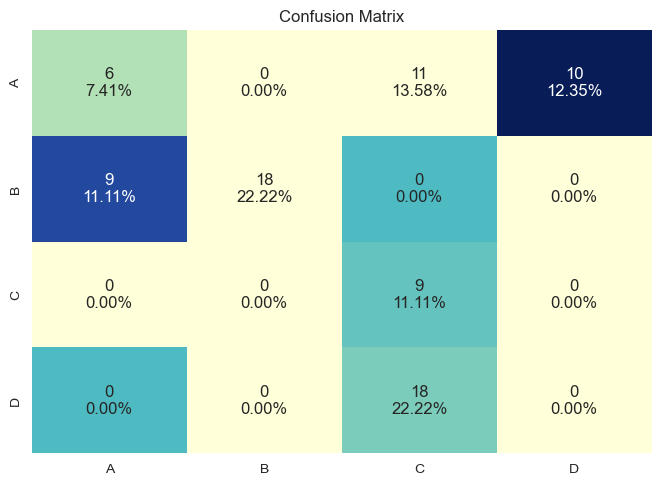

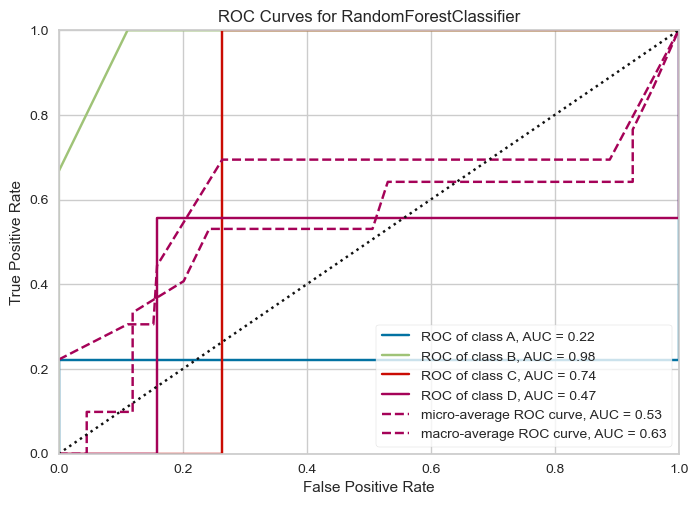

In [52]:
classifier = modelling.multiclass_classification(l1_df_oversampled, test_df_oversampled, identifier=id_features, target='Dukes Stage', k_fold=2, metric='accuracy', save_cv_results=False)

##### Auto-ML (TPOT)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


1.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(input_matrix, C=10.0, dual=True, loss=squared_hinge, penalty=l2, tol=0.001)

Test set performance of best performing model on the train set:
+----+------------+----------+-------------+------------+-----------------+
|    |   Accuracy |   Recall |   Precision |   F1 score |   Cohen's kappa |
|----+------------+----------+-------------+------------+-----------------|
|  0 |      0.333 |    0.333 |       0.419 |      0.277 |           0.179 |
+----+------------+----------+-------------+------------+-----------------+


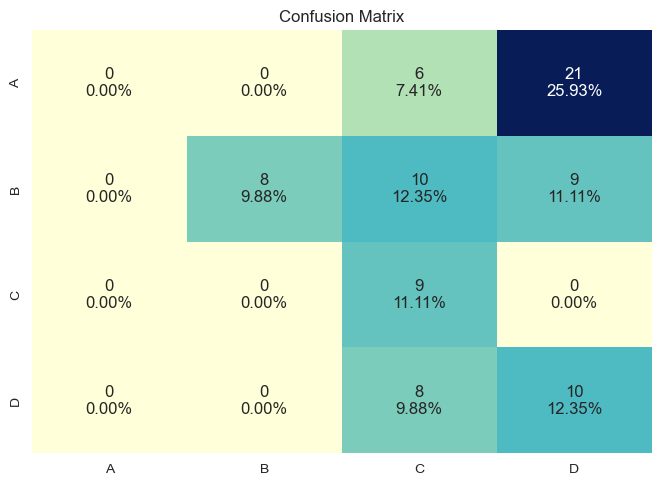

In [53]:
modelling.tpot_classification(l1_df_oversampled, test_df_oversampled, identifier=id_features, target='Dukes Stage', target_type="multiclass", generations=None, population_size=100, max_time_mins=1)

##### Feature Importance

+----+-------------------+----------------------+
|    | Top 10 Features   |   Feature Importance |
|----+-------------------+----------------------|
|  0 | 1553185_at        |                0.049 |
|  1 | 1553186_x_at      |                0.038 |
|  2 | 1554480_a_at      |                0.024 |
|  3 | 1553243_at        |                0.023 |
|  4 | 1552626_a_at      |                0.022 |
|  5 | 1552716_at        |                0.018 |
|  6 | 1553962_s_at      |                0.017 |
|  7 | 1554690_a_at      |                0.016 |
|  8 | 1553589_a_at      |                0.016 |
|  9 | 1554006_a_at      |                0.016 |
+----+-------------------+----------------------+


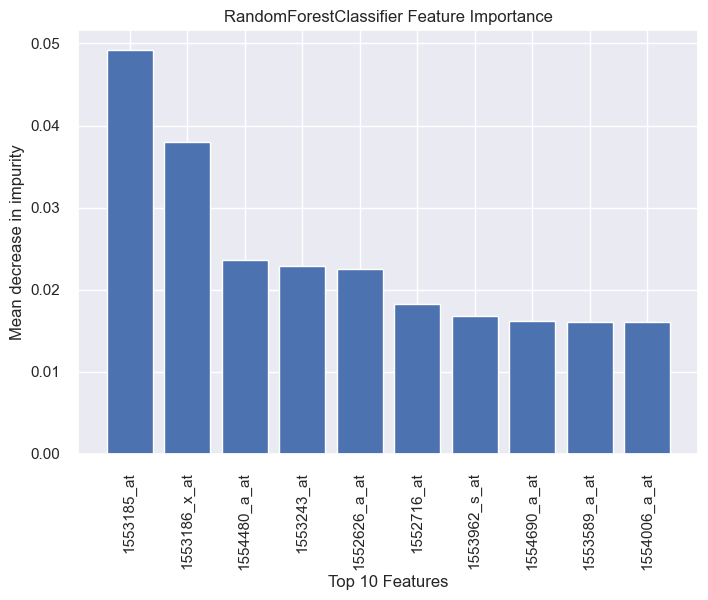

In [54]:
modelling.feature_importance(l1_df_oversampled, test_df_oversampled, identifier=id_features, target='Dukes Stage', classifier=classifier, top_features_to_view=10, use_boruta_shap=False)

#### SHAP (SHapley Additive exPlanations)

Permutation explainer: 82it [00:13,  2.03it/s]                        


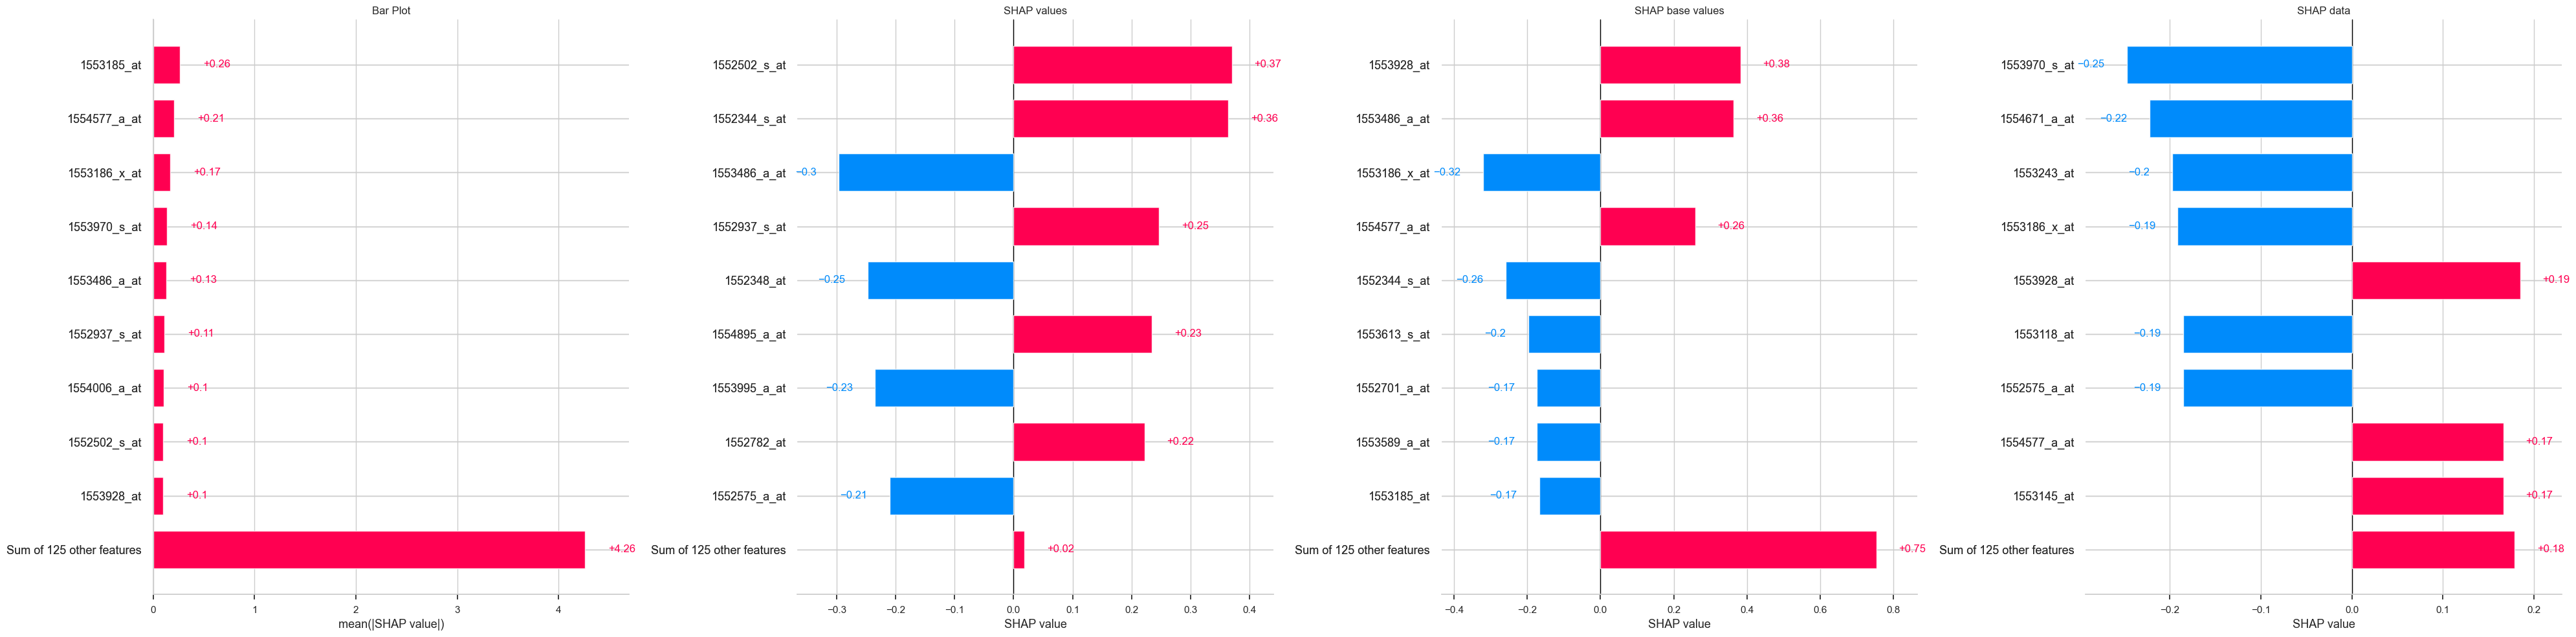

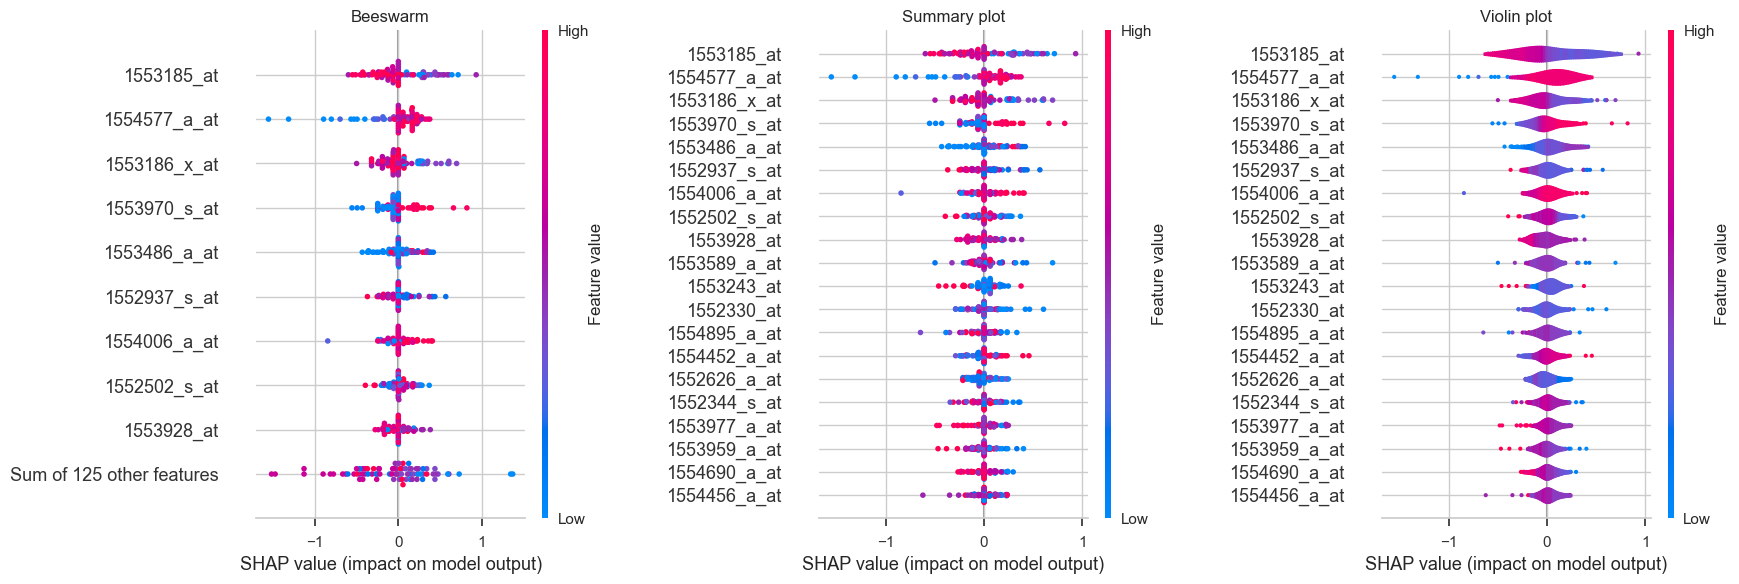

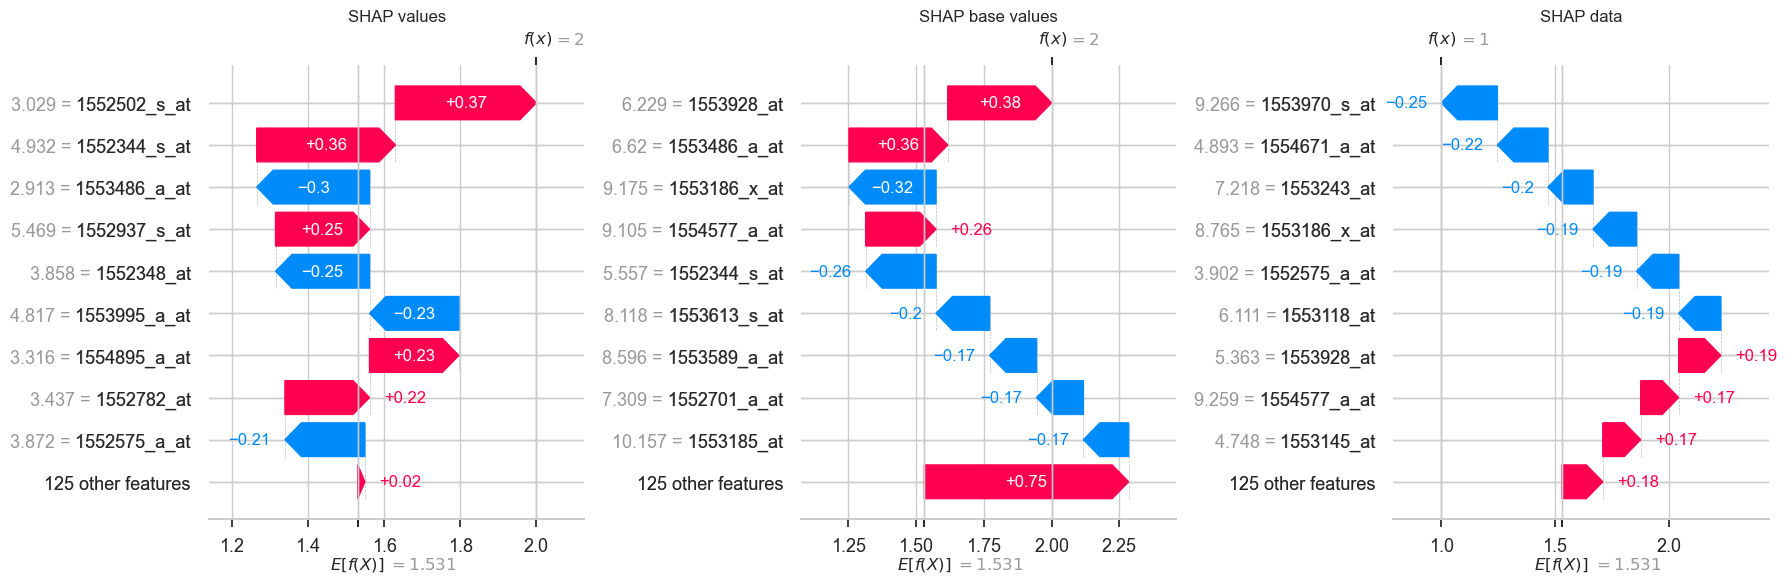

In [55]:
modelling.shap_value_analysis(l1_df_oversampled, test_df_oversampled, identifier=id_features, target='Dukes Stage', classifier=classifier)

#### Event Chart

In [56]:
modelling.event_chart(l1_df_oversampled, test_df_oversampled, identifier=id_features, target='Dukes Stage', classifier=classifier)